
Alunos:
  * Arthur Breno dos Reis Paula - 12547382
  * Fernando - 8556609
  * Mateus Israel Silva - 11735042

# Desafio: **Porto Seguro's Safe Driver Prediction**

OBJETIVO:
 - Calcular a probabilidade de um seguro automotivo ser acionado

# Biliotecas importadas

In [1]:
## Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Imputção de dados
from sklearn.impute import KNNImputer

## Decomposição
from sklearn.decomposition import PCA

## Pre processamento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Selecao de modelos
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Avaliar classificador
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import xgboost as xgb


Configuração gráfica

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

Importação dos dados

In [4]:
path_train = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/train_no_missing_scaled.csv'
path_test = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/test.csv'

In [5]:
dados_brutos = pd.read_csv(path_train)
dados_brutos_teste = pd.read_csv(path_test)

---

# Modelos de Aprendizado de Máquina

## Divisão dos dados

In [6]:
dados_brutos.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0.050218,0.964585,0.213594,1.182227,-0.299997,-0.805893,1.700163,-0.442786,-0.476919,...,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,0,-0.453868,-0.540094,0.954362,-0.844892,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,...,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,0,1.562477,3.973944,1.695130,1.182227,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,...,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,0,-0.957955,-0.540094,-0.897559,-0.844892,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,...,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,0,-0.957955,0.964585,-1.638327,1.182227,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,...,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537


In [7]:
X = dados_brutos.iloc[:, 1:]
y = dados_brutos.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
Counter(y_train)

Counter({0: 401539, 1: 15109})

## Regressão Logística

In [10]:
param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['saga'], 
        'random_state': [42]
    }, 
    {
        'penalty': ['l2'], 
        'solver': ['lbfgs', 'saga', 'sag', 'newton-cholesky', 'newton-cg'], 
        'random_state': [42]
    },
    {
        'penalty': ['elasticnet'], 
        'solver': ['saga'], 
        'l1_ratio': [0.5],
        'random_state': [42]
    }    
]

In [11]:
estimator = LogisticRegression()
cv = 3

In [12]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [13]:
clf.fit(X_train, y_train)

/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'penalty': ['l1'], 'random_state': [42],
                          'solver': ['saga']},
                         {'penalty': ['l2'], 'random_state': [42],
                          'solver': ['lbfgs', 'saga', 'sag', 'newton-cholesky',
                                     'newton-cg']},
                         {'l1_ratio': [0.5], 'penalty': ['elasticnet'],
                          'random_state': [42], 'solver': ['saga']}],
             scoring='f1')

Predição:

In [14]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [15]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    171979
           1       0.00      0.00      0.00      6585

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0

<Axes: >

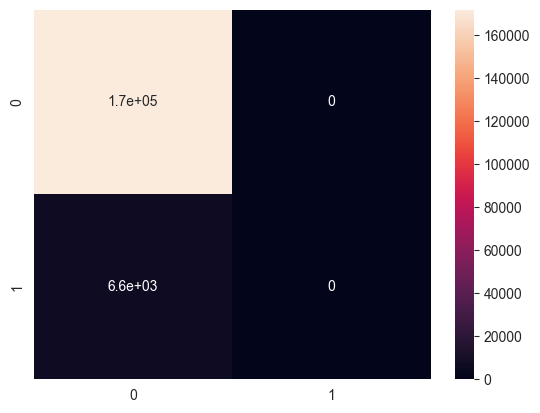

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True)

In [17]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.9631
AUC: 0.6160


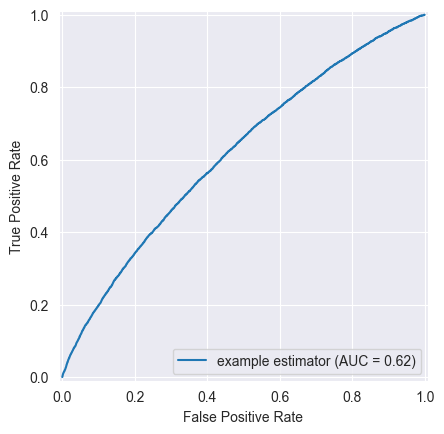

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## Random Forest

In [19]:
param_grid = [
    {
        'n_estimators': [10, 20, 50, 100],
        'criterion': ['gini', 'entropy', 'log_loss'], 
        'random_state': [42],
        'class_weight': [{0: 27.0, 1: 1.0}]
    }    
]

In [20]:
estimator = RandomForestClassifier()
cv = 3

In [21]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [22]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'class_weight': [{0: 27.0, 1: 1.0}],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          'n_estimators': [10, 20, 50, 100],
                          'random_state': [42]}],
             scoring='f1')

Predição:

In [23]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [24]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    171979
           1       0.08      0.00      0.00      6585

    accuracy                           0.96    178564
   macro avg       0.52      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



<Axes: >

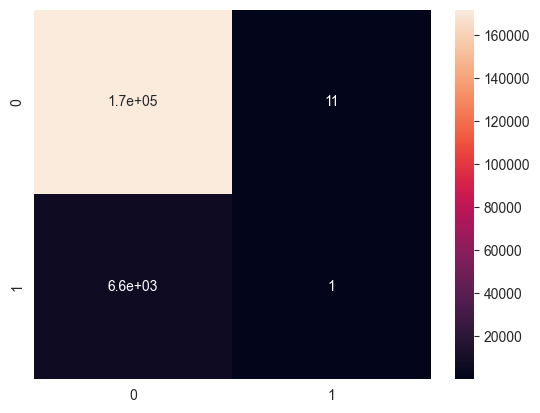

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True)

In [26]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.9631
AUC: 0.5419


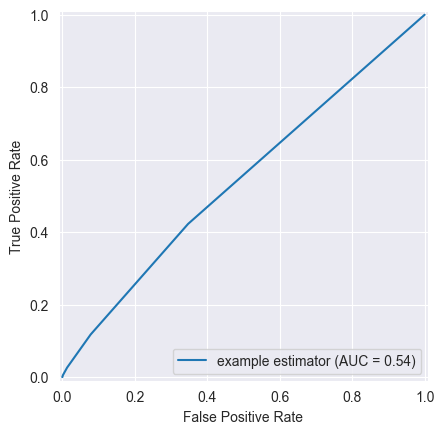

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## Gradient Boosting Classifier

In [28]:
param_grid = [
    {
        'n_estimators': [10, 20, 50, 100],
        'criterion': ['friedman_mse', 'squared_error'], 
        'random_state': [42]
    }    
]

In [29]:
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 27
sample_weights[y_train == 1] = 1

In [30]:
estimator = GradientBoostingClassifier()
cv = 3

In [31]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [32]:
clf.fit(X_train, y_train, sample_weight=sample_weights)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['friedman_mse', 'squared_error'],
                          'n_estimators': [10, 20, 50, 100],
                          'random_state': [42]}],
             scoring='f1')

Predição:

In [33]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [34]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    171979
           1       0.17      0.00      0.00      6585

    accuracy                           0.96    178564
   macro avg       0.57      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



<Axes: >

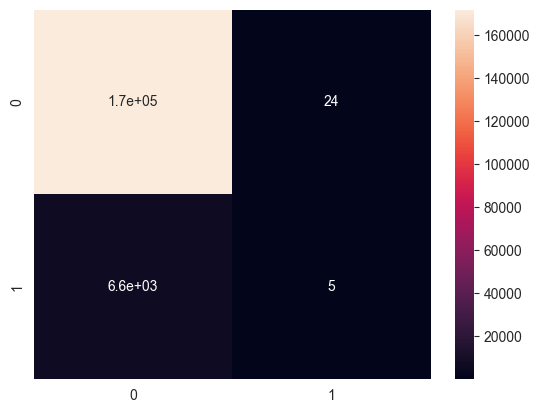

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True)

In [36]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.9630
AUC: 0.6337


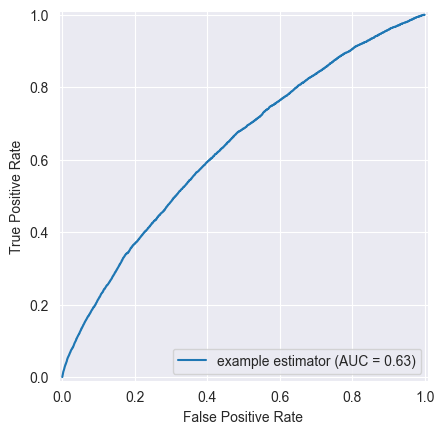

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## KNN

In [38]:
param_grid = [
    {
        'n_neighbors': [5, 10, 20, 50],
        'weights': ['uniform', 'distance'], 
        'algorithm': ['auto'],
        'p' : [2]
    }    
]

In [39]:
estimator = KNeighborsClassifier()
cv = 3

In [40]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [41]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto'], 'n_neighbors': [5, 10, 20, 50],
                          'p': [2], 'weights': ['uniform', 'distance']}],
             scoring='f1')

Predição:

In [42]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [43]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    171979
           1       0.12      0.00      0.00      6585

    accuracy                           0.96    178564
   macro avg       0.54      0.50      0.49    178564
weighted avg       0.93      0.96      0.94    178564



<Axes: >

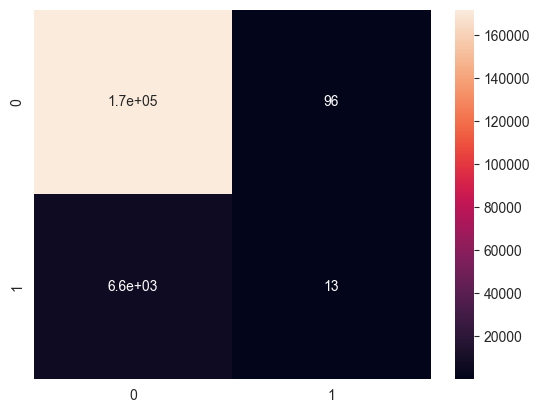

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True)

In [45]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.9627
AUC: 0.5138


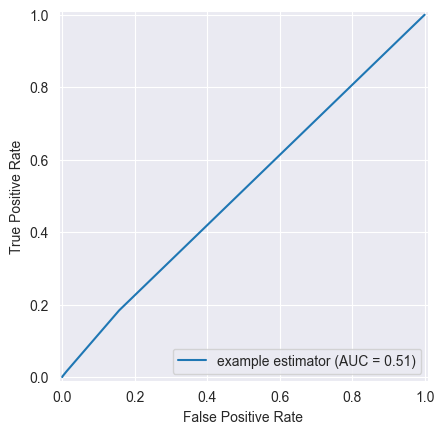

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## XGBOOST

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from collections import Counter

In [48]:
counter = Counter(y_train)
estimate = counter[0]/counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 26.576


In [52]:
model = XGBClassifier(scale_pos_weight=int(estimate))

In [53]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)


In [54]:
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.59718


In [56]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Predição:

In [57]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [58]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84    171979
           1       0.05      0.40      0.10      6585

    accuracy                           0.73    178564
   macro avg       0.51      0.57      0.47    178564
weighted avg       0.94      0.73      0.81    178564



<Axes: >

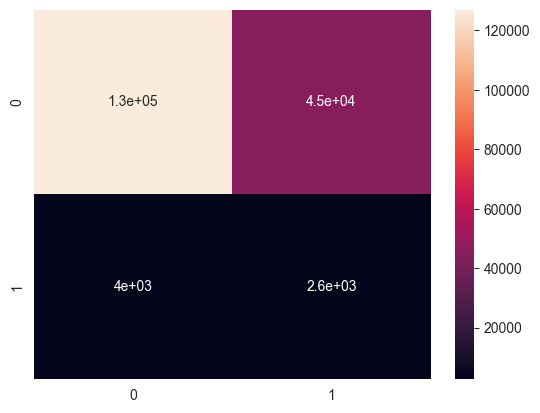

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True)

In [60]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.7257
AUC: 0.5964


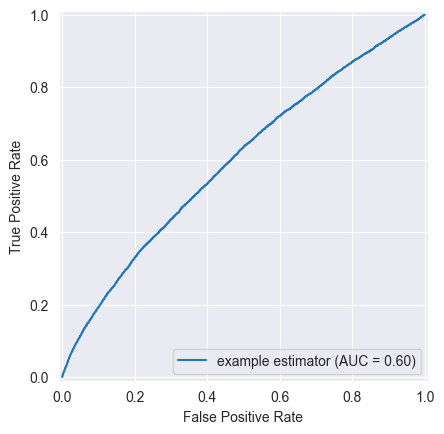

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()